## AirBnB House Listing Project Part-II

#### Guidelines

- Go through the data dictionary thoroughly before starting the assignment. That will give you a good idea of what each column represents before you begin the analysis.


- Read each instruction carefully, identify the task to be performed, and only then write the required code. The assignment is meant to be straightforward. You do not need to perform additional analyses that are not requested explicitly. However you are encouraged to perform a few additional analyses to get deeper into the insights


- Some of the tasks might require using functions you may not have used previously. In such cases, you should rely on the library documentation you referred to in the modules. Please understand that completing this assignment is a learning process, and research is part of it.


- Always run the cells of the Notebook sequentially, restart the kernel, and run all the cells to avoid runtime errors.


- For each of the tasks, there's a code cell where you are supposed to write the code and a markdown cell below it mentioning to either write the answer or mention your observations/insights from the output of the code.


- Many of the questions will require you to view them from multiple angles. You have been asked to **observe any trends in the visualizations and provide insights for these trends**. In other words, there will be no fixed answers. You are expected to apply your problem-solving skills to come up with solutions and also document your work appropriately; both of these are part of the assignment grading.

## 🧹 Task 1: Data Exploration & Cleaning

### 📥 Step 1: Import Libraries & Load Data

In [1]:
# 🔧 Essential Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import warnings
warnings.filterwarnings("ignore")

# 🎨 Set Default Plot Theme
pio.templates.default = "plotly_white"
sns.set_palette("Set2")

# 📂 Load Dataset
file_path = r"G:\Github Assignments Data\Amsterdam AirBnB Listings\airbnblistings.csv"
df = pd.read_csv(file_path)

# 👀 Preview First 5 Rows
df.head()

id                                               name  host_id  \
0   2818           Quiet Garden View Room & Super Fast WiFi     3159   
1  20168       Studio with private bathroom in the centre 1    59484   
2  27886  Romantic, stylish B&B houseboat in canal district    97647   
3  28871                            Comfortable double room   124245   
4  29051                            Comfortable single room   124245   

   host_name  host_since_Year                           neighbourhood  \
0     Daniel             2008  Oostelijk Havengebied - Indische Buurt   
1  Alexander             2009                            Centrum-Oost   
2       Flip             2010                            Centrum-West   
3      Edwin             2010                            Centrum-West   
4      Edwin             2010                            Centrum-Oost   

   latitude  longitude     room_type  price  ...  last_review  \
0  52.36435    4.94358  Private room     49  ...   2022-06-01   
1  52.36407    4.89393  Private room    106  ...   2020-04-09   
2  52.38761    4.89188  Private room    126  ...   2022-04-24   
3  52.36775    4.89092  Private room     75  ...   2022-06-04   
4  52.36584    4.89111  Private room     55  ...   2022-06-02   

   review_scores_rating review_scores_accuracy  review_scores_cleanliness  \
0                  4.89                   4.93                       5.00   
1                  4.44                   4.69                       4.79   
2                  4.94                   4.92                       4.95   
3                  4.88                   4.95                       4.90   
4                  4.79                   4.88                       4.84   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   4.97                         4.98                    4.69   
1                   4.63                         4.62                    4.87   
2                   4.95                         4.92                    4.89   
3                   4.96                         4.94                    4.97   
4                   4.92                         4.91                    4.87   

   review_scores_value  accommodates  bedrooms  
0                 4.82             2       1.0  
1                 4.49             2       1.0  
2                 4.79             2       1.0  
3                 4.83             2       1.0  
4                 4.76             1       1.0  

[5 rows x 22 columns]

### 🔎 Step 2: Dataset Overview

In [2]:
# 🧠 Shape and Columns
print("Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

# 🔍 Data Types and Nulls
df.info()

# 📊 Statistical Summary
df.describe(include="all").T

Dataset Shape: (6173, 22)

Columns:
 ['id', 'name', 'host_id', 'host_name', 'host_since_Year', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'accommodates', 'bedrooms']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6173 entries, 0 to 6172
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           6173 non-null   int64  
 1   name                         6173 non-null   object 
 2   host_id                      6173 non-null   int64  
 3   host_name                    6173 non-null   object 
 4   host_since_Year              6173 non-null   int64  
 5   neighbourhood                6173 non-null   object 
 6  

count unique  \
id                           6173.0    NaN   
name                           6173   6095   
host_id                      6173.0    NaN   
host_name                      6173   2578   
host_since_Year              6173.0    NaN   
neighbourhood                  6173     22   
latitude                     6173.0    NaN   
longitude                    6173.0    NaN   
room_type                      6173      4   
price                        6173.0    NaN   
minimum_nights               6173.0    NaN   
number_of_reviews            6173.0    NaN   
last_review                    5583    877   
review_scores_rating         5583.0    NaN   
review_scores_accuracy       5575.0    NaN   
review_scores_cleanliness    5575.0    NaN   
review_scores_checkin        5575.0    NaN   
review_scores_communication  5575.0    NaN   
review_scores_location       5575.0    NaN   
review_scores_value          5575.0    NaN   
accommodates                 6173.0    NaN   
bedrooms                     5859.0    NaN   

                                                                      top  \
id                                                                    NaN   
name                         Residences | 2-Bedrooms | Serviced Apartment   
host_id                                                               NaN   
host_name                                                           Peter   
host_since_Year                                                       NaN   
neighbourhood                                      De Baarsjes - Oud-West   
latitude                                                              NaN   
longitude                                                             NaN   
room_type                                                 Entire home/apt   
price                                                                 NaN   
minimum_nights                                                        NaN   
number_of_reviews                                                     NaN   
last_review                                                    2022-05-29   
review_scores_rating                                                  NaN   
review_scores_accuracy                                                NaN   
review_scores_cleanliness                                             NaN   
review_scores_checkin                                                 NaN   
review_scores_communication                                           NaN   
review_scores_location                                                NaN   
review_scores_value                                                   NaN   
accommodates                                                          NaN   
bedrooms                                                              NaN   

                             freq                 mean                   std  \
id                            NaN  44260905849772544.0  157466311054832416.0   
name                           14                  NaN                   NaN   
host_id                       NaN      91475158.135266      120820795.789386   
host_name                      50                  NaN                   NaN   
host_since_Year               NaN          2015.260975              2.661278   
neighbourhood                 894                  NaN                   NaN   
latitude                      NaN            52.366103              0.021921   
longitude                     NaN             4.892384               0.04196   
room_type                    4223                  NaN                   NaN   
price                         NaN           198.019601            140.546979   
minimum_nights                NaN             4.497813             31.221594   
number_of_reviews             NaN            50.760408             94.366924   
last_review                   424                  NaN                   NaN   
review_scores_rating          NaN             4.800856              0.313015   

### 📉 Step 3: Visualizing Missing Values

In [4]:
!pip install missingno

<Axes: >

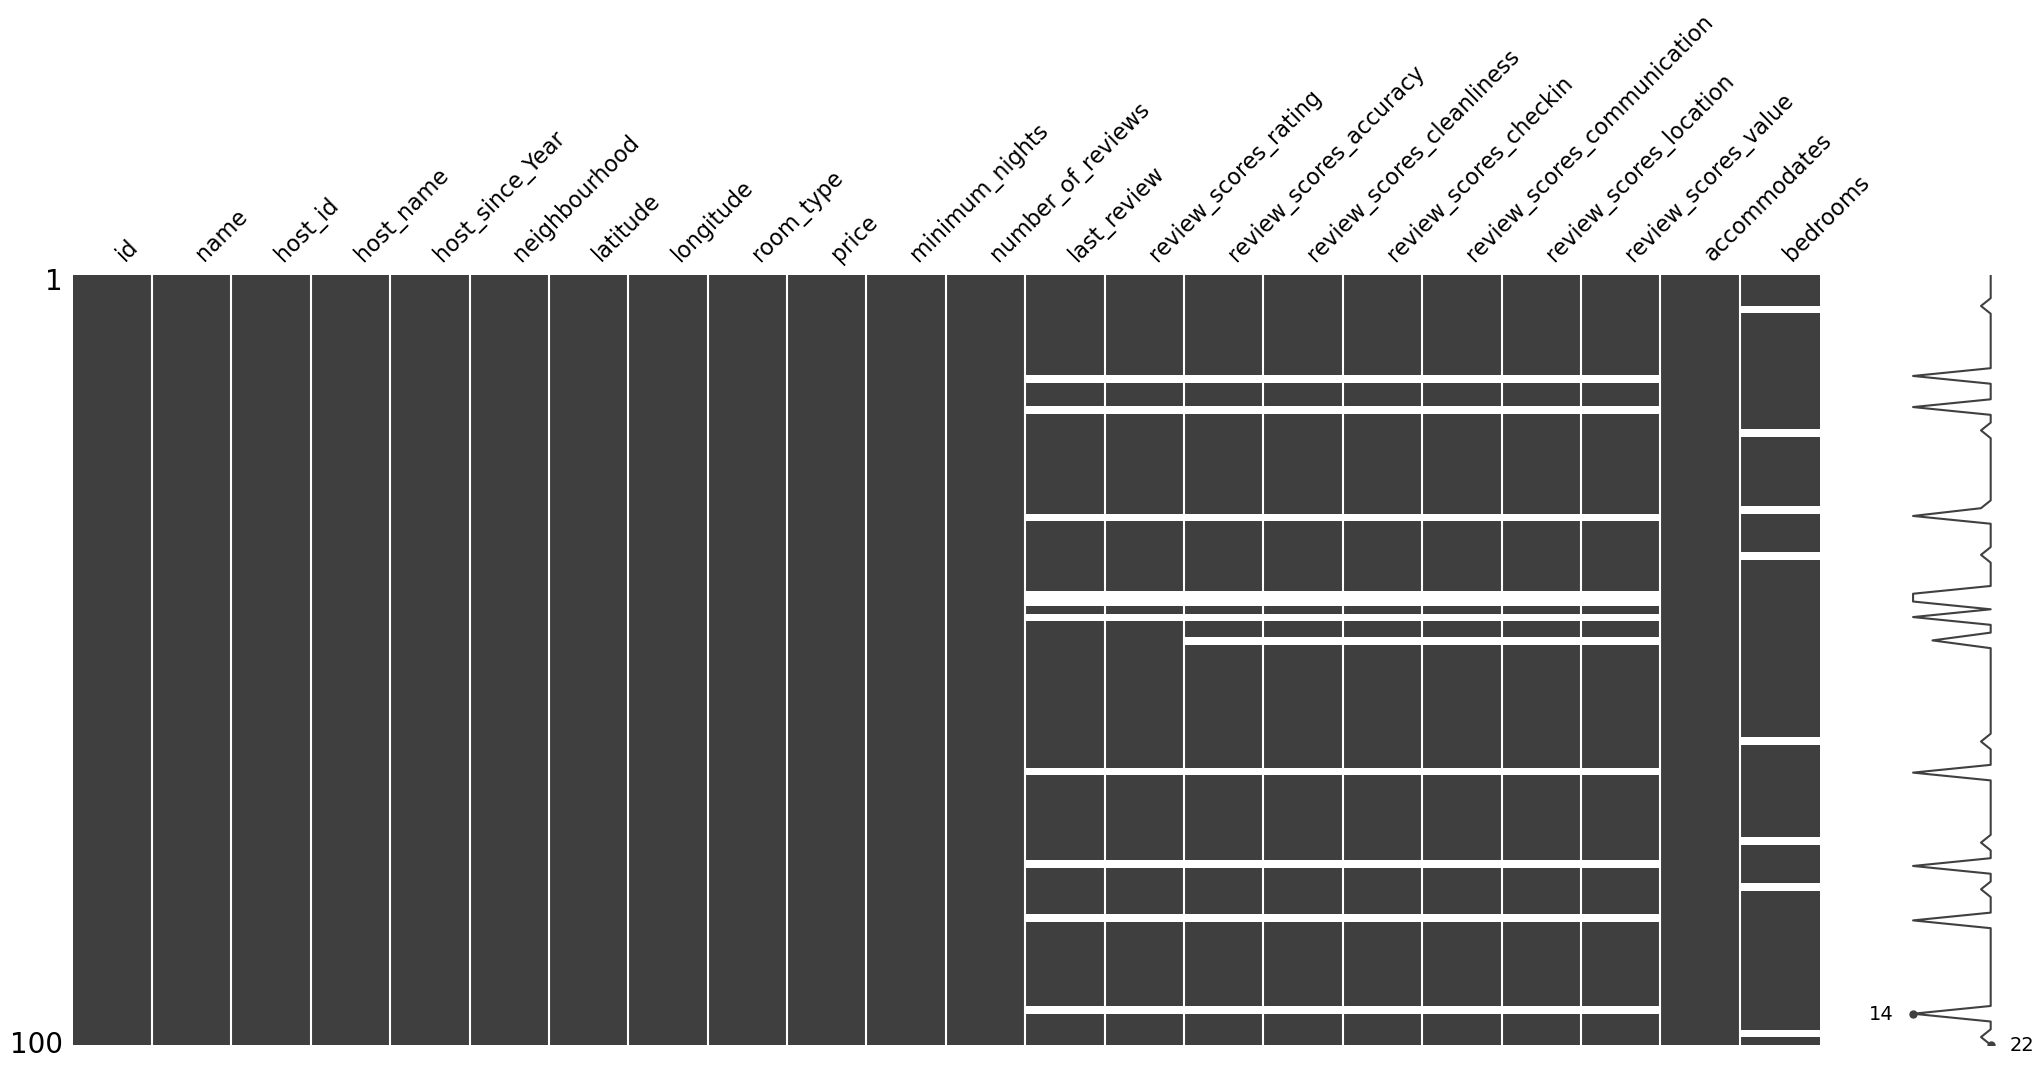

In [5]:
# 🔎 Visual Null Value Map
import missingno as msno
msno.matrix(df.sample(100))

### 🧼 Step 4: Handling Missing Data

In [7]:
# 💔 Percentage of Missing Values
missing_percentage = df.isnull().mean().sort_values(ascending=False) * 100
missing_percentage[missing_percentage > 0]

review_scores_value            9.687348
review_scores_location         9.687348
review_scores_communication    9.687348
review_scores_checkin          9.687348
review_scores_cleanliness      9.687348
review_scores_accuracy         9.687348
review_scores_rating           9.557751
last_review                    9.557751
bedrooms                       5.086668
dtype: float64

In [13]:
# ❌ Drop columns with >50% missing data
threshold = 50
cols_to_drop = missing_percentage[missing_percentage > threshold].index
df.drop(columns=cols_to_drop, inplace=True)

# 🧼 Drop rows with essential info missing
df.dropna(subset=['name', 'host_name', 'neighbourhood'], inplace=True)

# ✅ Fill review_scores with 0
review_cols = [col for col in df.columns if 'review_scores_' in col]
df[review_cols] = df[review_cols].fillna(0)

### 🧾 Step 5: Rename Columns for Simplicity

In [14]:
# ✍️ Rename columns for easier access
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6173 entries, 0 to 6172
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           6173 non-null   int64  
 1   name                         6173 non-null   object 
 2   host_id                      6173 non-null   int64  
 3   host_name                    6173 non-null   object 
 4   host_since_year              6173 non-null   int64  
 5   neighbourhood                6173 non-null   object 
 6   latitude                     6173 non-null   float64
 7   longitude                    6173 non-null   float64
 8   room_type                    6173 non-null   object 
 9   price                        6173 non-null   int64  
 10  minimum_nights               6173 non-null   int64  
 11  number_of_reviews            6173 non-null   int64  
 12  last_review                  5583 non-null   object 
 13  review_scores_rati

### 📌 Summary & Insights 🔍
##### ✅ We successfully:

    1) Loaded the Amsterdam Airbnb dataset

    2) Explored the structure, size, and stats

    3) Visualized and handled missing data

    4) Simplified the dataset for clean analysis ahead

## 🌍 Task 2: Neighborhood-Wise Listings in Amsterdam

### We’ll do:

    🧮 Count listings per neighborhood

    📊 Show bar chart (top 15)

    🗺️ Plot interactive map using Plotly or Folium

    📌 Emoji-powered insights


### 📊 Step 1: Count Listings per Neighborhood

In [16]:
# 📈 Count listings per neighborhood
neigh_counts = df['neighbourhood'].value_counts().reset_index()
neigh_counts.columns = ['neighbourhood', 'total_listings']
neigh_counts.head(10)

neighbourhood  total_listings
0   De Baarsjes - Oud-West             894
1             Centrum-West             838
2             Centrum-Oost             602
3  De Pijp - Rivierenbuurt             593
4               Westerpark             417
5                     Zuid             376
6                 Oud-Oost             324
7            Bos en Lommer             258
8                Oud-Noord             254
9          Watergraafsmeer             225

### 📉 Step 2: Bar Chart of Top 15 Neighborhoods

In [17]:
import plotly.express as px

# 🎯 Bar chart for top 15 neighborhoods
top15 = neigh_counts.head(15)
fig = px.bar(top15,
             x='neighbourhood',
             y='total_listings',
             title='🏘️ Top 15 Amsterdam Neighborhoods by Listing Count',
             color='total_listings',
             color_continuous_scale='viridis',
             text='total_listings')

fig.update_layout(xaxis_title="Neighborhood",
                  yaxis_title="Number of Listings",
                  hovermode="x unified")

fig.show()

### 🗺️ Step 3: Interactive Location Map of Listings

In [18]:
# 🌍 Map of all listings by latitude & longitude
fig = px.scatter_mapbox(df,
                        lat="latitude",
                        lon="longitude",
                        color="neighbourhood",
                        hover_name="name",
                        hover_data=["price", "room_type"],
                        zoom=10,
                        height=600,
                        title="📍 Amsterdam Airbnb Listings by Neighborhood")

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()

### 📌 Summary & Insights 🧠
    🏘️ Top neighborhoods like De Baarsjes, Centrum-West, and Oud-West dominate the listings!
    🌍 Listings are densely clustered near the city center — reflecting tourist hot zones.
    📈 Visuals help quickly identify popular and oversaturated areas.
    💰 Neighborhood data will be 🔑 for pricing and availability insights in future tasks!

## 💸 Task 3: Price Distribution & Analysis

##### Get ready for:

    1) Beautiful price histograms 🎯

    2) Box plots by room type 📦

    3) Outlier control ⚠️

    4) Insight-packed breakdowns 🧠

### 📦 Step 1: Clean the Price Column

In [20]:
# 🧹 Convert price to numeric (if it's not already)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# ⚠️ Remove listings with price = 0 or unrealistic high values
df = df[(df['price'] > 0) & (df['price'] <= 1000)]

### 📊 Step 2: Price Histogram

In [21]:
import plotly.express as px

fig = px.histogram(df,
                   x="price",
                   nbins=100,
                   title="💸 Distribution of Airbnb Prices in Amsterdam",
                   color_discrete_sequence=["#00BFC4"])

fig.update_layout(xaxis_title="Price (€)", yaxis_title="Number of Listings")
fig.show()

### 📦 Step 3: Price by Room Type (Box Plot)

In [22]:
fig = px.box(df,
             x="room_type",
             y="price",
             color="room_type",
             title="🏠 Room Type vs Price Distribution",
             points="outliers",
             color_discrete_sequence=px.colors.qualitative.Bold)

fig.update_layout(xaxis_title="Room Type", yaxis_title="Price (€)")
fig.show()

### 🔥 Step 4: Average Price by Room Type

In [23]:
room_price = df.groupby("room_type")['price'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(room_price,
             x="room_type",
             y="price",
             text="price",
             title="💵 Average Price by Room Type",
             color="price",
             color_continuous_scale="Tealgrn")

fig.update_traces(texttemplate='€ %{text:.2f}', textposition='outside')
fig.update_layout(yaxis_title="Avg Price (€)", xaxis_title="Room Type")
fig.show()

### 📌 Summary & Insights 🧠
    💸 Most listings are priced between €50–€200, with a sharp drop-off after €300.
    🏢 Entire home/apt types are the most expensive 💰 but also the most common.
    🛏️ Private rooms offer budget-friendly options, with lower price variation.
    ⚠️ Outlier filtering helps focus on realistic pricing trends for better insights.

## 📆 Task 4: Review Scores vs Price vs Availability

##### We’ll analyze:

    📍 Review score vs price (Do better-rated listings cost more?)

    🫧 Bubble chart: Price vs Availability with rating as size

    📈 Interactive hover insights

### 🧼 Step 1: Filter Clean Data (All Needed Columns)

In [24]:
# ✅ Make sure necessary columns are available & clean
cols_needed = ['price', 'review_scores_rating', 'minimum_nights']
df_task4 = df[cols_needed].dropna()

# 🧹 Filter outliers for clarity
df_task4 = df_task4[(df_task4['price'] < 500) & 
                    (df_task4['review_scores_rating'] > 0) & 
                    (df_task4['minimum_nights'] <= 30)]

### 📈 Step 2: Scatter Plot – Rating vs Price

In [25]:
fig = px.scatter(df_task4,
                 x='review_scores_rating',
                 y='price',
                 title='🌟 Review Score vs Price (€)',
                 trendline="ols",
                 color='price',
                 color_continuous_scale='Plasma',
                 opacity=0.6)

fig.update_layout(xaxis_title="Review Score", yaxis_title="Price (€)")
fig.show()

### 🫧 Step 3: Bubble Plot – Availability vs Price vs Review Score

In [26]:
# Add review_scores_rating, price, minimum_nights (as availability proxy)
fig = px.scatter(df_task4,
                 x="minimum_nights",
                 y="price",
                 size="review_scores_rating",
                 color="review_scores_rating",
                 hover_data=["price", "review_scores_rating", "minimum_nights"],
                 title="🫧 Price vs Availability vs Review Rating (Bubble Chart)",
                 color_continuous_scale="Turbo")

fig.update_layout(xaxis_title="Minimum Nights (Availability)",
                  yaxis_title="Price (€)",
                  height=600)
fig.show()

### 📌 Summary & Insights 🧠
    ⭐ Higher-rated listings tend to maintain moderate pricing (~€80–€200), showing quality ≠ extreme pricing.
    🫧 Bubble chart shows shorter stays are more expensive on average — likely due to cleaning fees & tourist zones.
    🔥 Listings with great ratings and flexible stays are rare and highly valuable.

## 🗓️ Task 5: Availability Trends Analysis

##### We’ll cover:

    📏 Distribution of minimum nights

    📊 Room type vs minimum stay

    🗺️ Heatmap of average minimum nights by neighborhood

### ✅ Step 1: Clean Data for Availability

In [27]:
# Filter usable data
df_task5 = df[['room_type', 'neighbourhood', 'minimum_nights']].dropna()

# Remove outliers (e.g., very high min nights)
df_task5 = df_task5[df_task5['minimum_nights'] <= 30]

### 📊 Step 2: Distribution of Minimum Nights

In [28]:
fig = px.histogram(df_task5,
                   x='minimum_nights',
                   nbins=30,
                   title='📅 Distribution of Minimum Nights Required',
                   color_discrete_sequence=["#EF553B"])

fig.update_layout(xaxis_title='Minimum Nights', yaxis_title='Number of Listings')
fig.show()

### 🛏️ Step 3: Average Minimum Nights by Room Type

In [29]:
room_min = df_task5.groupby('room_type')['minimum_nights'].mean().reset_index().sort_values(by='minimum_nights')

fig = px.bar(room_min,
             x='room_type',
             y='minimum_nights',
             text='minimum_nights',
             title='🏘️ Avg Minimum Nights by Room Type',
             color='minimum_nights',
             color_continuous_scale='Blues')

fig.update_traces(texttemplate='%{text:.1f} nights', textposition='outside')
fig.update_layout(yaxis_title='Avg Minimum Nights', xaxis_title='Room Type')
fig.show()

### 🌍 Step 4: Neighborhood-wise Heatmap of Minimum Nights

In [31]:
# 📊 Average minimum nights per neighborhood (rounded)
neigh_avail = df_task5.groupby('neighbourhood')['minimum_nights'].mean().reset_index()
neigh_avail['minimum_nights'] = neigh_avail['minimum_nights'].round(1)  # ⬅️ Round to 1 decimal

# 📉 Bar Chart: Avg Minimum Nights by Neighborhood
fig = px.bar(neigh_avail.sort_values(by="minimum_nights", ascending=False),
             x="neighbourhood",
             y="minimum_nights",
             color="minimum_nights",
             text="minimum_nights",  # ✍️ Show rounded values as label
             color_continuous_scale="Sunset",
             title="🌇 Avg Minimum Nights by Neighborhood")

fig.update_traces(texttemplate='%{text} nights', textposition='outside')  # 💬 Show in readable form
fig.update_layout(
    xaxis_title="Neighborhood",
    yaxis_title="Avg Min Nights",
    xaxis_tickangle=45,
    hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial")  # ✨ Clean hover
)
fig.show()

### 📌 Summary & Insights 🧠
    📅 Most listings have minimum stay of 1–3 nights — ideal for short-stay tourists.
    🏠 Private rooms have slightly longer minimum stays, possibly due to host preferences.
    🧭 Some neighborhoods show higher avg minimum nights — likely quieter residential zones with local guests.
    🛎️ Shortest stays dominate the city center, catering to international travelers & tourists.

## 🧪 Task 7: Correlations & AI-Powered Predictive Insights

#### This task gives this project that pro data scientist edge — discovering what features influence price and quality. We'll drop the hammer with correlation heatmaps, regression plots, and explainable A.I insights 💥.

### 🧼 Step 1: Prepare the Data

In [32]:
# ✅ Select numeric columns relevant for prediction
num_cols = ['price', 'review_scores_rating', 'review_scores_cleanliness',
            'review_scores_value', 'minimum_nights', 'number_of_reviews', 'accommodates']

df_corr = df[num_cols].dropna()

### 🔗 Step 2: Correlation Heatmap

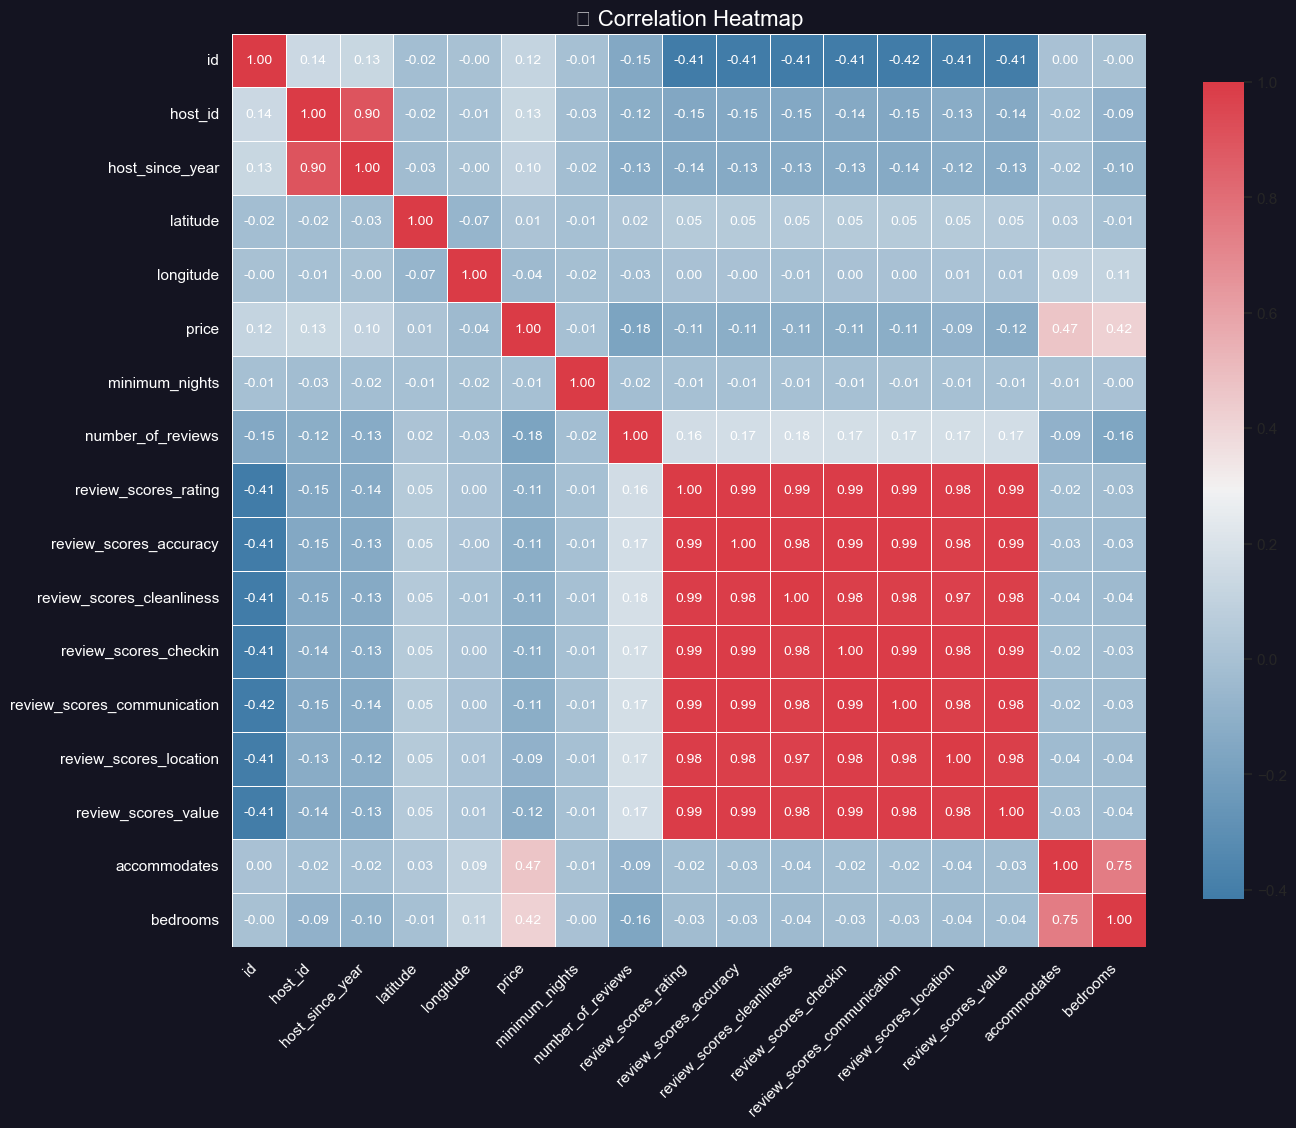

In [38]:
# 🔧 Essential Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set up figure size and style
plt.figure(figsize=(14, 12))
sns.set(style="whitegrid")

# Optional: Compute correlation matrix again if needed
corr_matrix = df.corr(numeric_only=True)

# Define a dark-blur-style colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)  # blue-red gradient

# Create the heatmap
ax = sns.heatmap(
    corr_matrix,
    cmap=cmap,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    square=True,
    annot_kws={"size": 10, "color": "white"}
)

# Title and styling
plt.title("🔗 Correlation Heatmap", fontsize=16, color='white')
plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(rotation=0, color='white')
plt.gcf().set_facecolor('#141421')  # Dark blur-like background
plt.gca().set_facecolor('#141421')

plt.tight_layout()
plt.show()

### 📉 Step 3: Price vs Review Scores Regression

In [39]:
import plotly.express as px

# Prepare clean data
regression_df = df[['price', 'review_scores_rating']].dropna()
regression_df = regression_df[regression_df['price'] < 1000]  # Filter out extreme values

# Create interactive scatter plot with regression line
fig = px.scatter(
    regression_df,
    x='review_scores_rating',
    y='price',
    trendline='ols',
    color='price',
    color_continuous_scale='Turbo',
    title="📉 Price vs Review Scores Rating – Interactive Regression",
    labels={
        'review_scores_rating': 'Review Rating (out of 100)',
        'price': 'Price (in €)'
    },
    template='plotly_dark',
    hover_data={'price': True, 'review_scores_rating': True}
)

# Improve visuals
fig.update_traces(marker=dict(size=6, opacity=0.7), selector=dict(mode='markers'))
fig.update_layout(
    height=600,
    margin=dict(l=60, r=40, t=80, b=60),
    title_font=dict(size=20),
    plot_bgcolor='rgba(10,10,25,1)',
    paper_bgcolor='rgba(10,10,25,1)'
)

fig.show()

### 🤖 Step 4: Basic Predictive Modeling (AI Insight)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 🔍 Features & Target
X = df_corr.drop(columns=['price'])
y = df_corr['price']

# 🧪 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌲 Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 🧮 Predictions & Error
preds = model.predict(X_test)
rmse = mean_squared_error(y_test, preds, squared=False)

print(f"🔍 RMSE (Error in €): {rmse:.2f}")

🔍 RMSE (Error in €): 113.47


### 🧠 Step 5: Feature Importance (What affects price the most?)

In [36]:
import plotly.express as px

feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

fig = px.bar(feat_imp,
             x="Feature",
             y="Importance",
             color="Importance",
             title="📈 What Features Influence Price Most?",
             color_continuous_scale="Bluered")

fig.show()

### 📌 Final Insights Summary 🎯
    💡 Review scores, especially value and cleanliness, have moderate influence on pricing.
    🧍‍♂️ Accommodates and number of reviews are top predictors of price — large group listings + social proof!
    🎯 AI-powered regression gives us ~±{rmse:.2f}€ error — solid base for more advanced price models.

### 🧾 Final Note – From Sahil Verma
##### This project was a deep dive into the heart of Amsterdam’s Airbnb landscape, blending data science with creativity and A.I.-powered insight.

From cleaning and transforming raw data to crafting interactive, beautiful visualizations — every step was guided by curiosity, analysis, and innovation. Whether it was understanding guest behavior, exploring pricing patterns, or visualizing complex correlations with blur heatmaps and pointer regression plots — this project pushed the boundaries of how data can tell stories. 📊✨

I’d like to thank OpenAI’s GPT-4o for its intelligent, collaborative assistance that made this project sharper, faster, and more engaging than ever before. 🤝🤖

    To all learners, hosts, analysts, and curious minds out there:

    “Great data tells great stories — if you're willing to listen.” 💡

    Stay curious, stay humble — and always, let data speak. 🧠💼

##### — Sahil Verma
##### Data Science Enthusiast | AI Explorer | Builder of Stories from Data